In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mall-customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis = 1, inplace=True)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.rename(columns={'Age' : 'age', 'Annual Income (k$)' : 'income', 'Spending Score (1-100)' : 'score'}, inplace = True)

In [7]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
#Viz

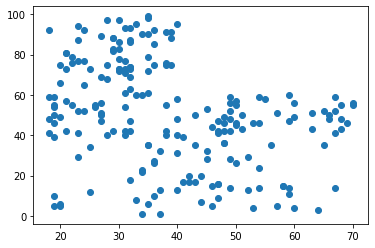

In [9]:
plt.scatter(df.age, df.score)

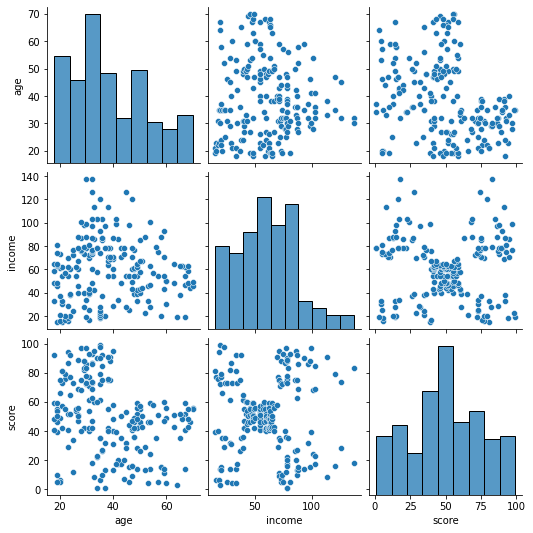

In [10]:
sns.pairplot(df[['age','income','score']])

In [11]:
import sklearn.cluster as cluster

In [12]:
kmean1 = cluster.KMeans()

In [13]:
kmean1.fit(df[['income','score']])

KMeans()

In [14]:
kmean1.predict(df[['income','score']])

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 6, 2, 6, 2, 2, 6, 6, 2, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 1, 7, 6, 7, 1, 7, 1, 7,
       6, 7, 1, 7, 1, 7, 1, 7, 1, 7, 6, 7, 1, 7, 6, 7, 1, 7, 1, 7, 1, 7,
       1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7,
       1, 7, 1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0])

In [15]:
#kmean1.fit_predict(df[['income','score']])

In [16]:
df['predicted cluster'] = kmean1.predict(df[['income','score']])

In [17]:
df.head()

,Gender,age,income,score,predicted cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [18]:
df.tail()

,Gender,age,income,score,predicted cluster
195,Female,35,120,79,0
196,Female,45,126,28,5
197,Male,32,126,74,0
198,Male,32,137,18,5
199,Male,30,137,83,0


In [19]:
center1 = kmean1.cluster_centers_

In [20]:
center1

array([[108.18181818,  82.72727273],
       [ 79.70833333,  14.29166667],
       [ 45.97368421,  51.26315789],
       [ 25.0952381 ,  80.04761905],
       [ 25.14285714,  19.52380952],
       [109.7       ,  22.        ],
       [ 62.23404255,  47.55319149],
       [ 78.03571429,  81.89285714]])

In [21]:
df0 = df[df['predicted cluster']==0]
df1 = df[df['predicted cluster']==1]
df2 = df[df['predicted cluster']==2]
df3 = df[df['predicted cluster']==3]
df4 = df[df['predicted cluster']==4]
df5 = df[df['predicted cluster']==5]
df6 = df[df['predicted cluster']==6]
df7 = df[df['predicted cluster']==7]

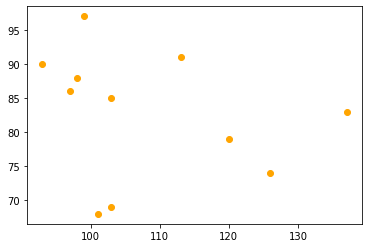

In [22]:
plt.scatter(df0['income'],df0['score'] ,color = 'orange', label = 'cluster0')

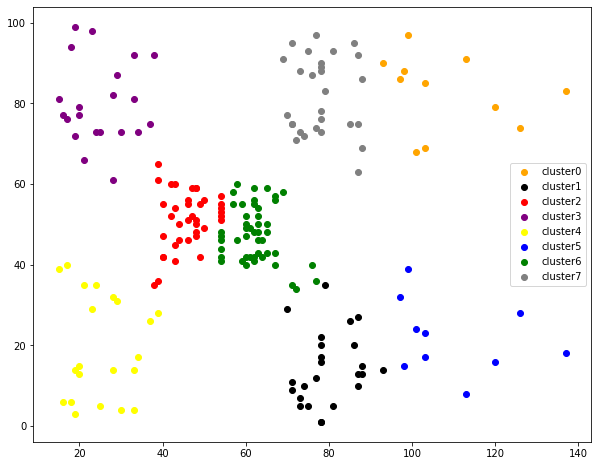

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(df0['income'],df0['score'] ,color = 'orange', label = 'cluster0')
plt.scatter(df1['income'],df1['score'] ,color = 'black', label = 'cluster1')
plt.scatter(df2['income'],df2['score'] ,color = 'red', label = 'cluster2')
plt.scatter(df3['income'],df3['score'] ,color = 'purple', label = 'cluster3')
plt.scatter(df4['income'],df4['score'] ,color = 'yellow', label = 'cluster4')
plt.scatter(df5['income'],df5['score'] ,color = 'blue', label = 'cluster5')
plt.scatter(df6['income'],df6['score'] ,color = 'green', label = 'cluster6')
plt.scatter(df7['income'],df7['score'] ,color = 'gray', label = 'cluster7')
plt.legend()


# Tuning

In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss = []

clusters = range(1,16)

for k in clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['score', 'income']])
    wcss.append(kmeans.inertia_)

In [26]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 25061.304119069322,
 21830.04197804944,
 20054.662261757847,
 17879.739741460096,
 15836.962939071014,
 14666.474696940497,
 13186.285963128988,
 12104.655900580896]

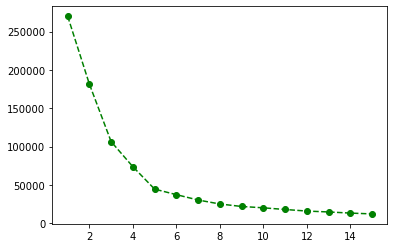

In [27]:
plt.plot(clusters, wcss, 'go--')

In [28]:
#from kneed import kneeLocator
#kn = kneeLocator(cluster, wcss, curve = 'convex', direction = 'decreasing')
#kn.knee
#kn.plot_knee()

# k =5,CLUSTER = 5

In [29]:
kmean2 = cluster.KMeans(n_clusters=5)

In [30]:
kmean2

KMeans(n_clusters=5)

In [31]:
df['new cluster']=kmean2.fit_predict(df[['income','score']])

In [32]:
df.head()

,Gender,age,income,score,predicted cluster,new cluster
0,Male,19,15,39,4,4
1,Male,21,15,81,3,0
2,Female,20,16,6,4,4
3,Female,23,16,77,3,0
4,Female,31,17,40,4,4


In [33]:
df0 = df[df['new cluster']==0]
df1 = df[df['new cluster']==1]
df2 = df[df['new cluster']==2]
df3 = df[df['new cluster']==3]
df4 = df[df['new cluster']==4]


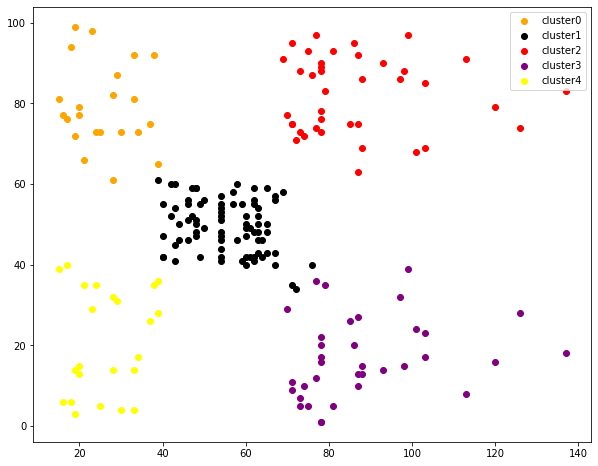

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(df0['income'],df0['score'] ,color = 'orange', label = 'cluster0')
plt.scatter(df1['income'],df1['score'] ,color = 'black', label = 'cluster1')
plt.scatter(df2['income'],df2['score'] ,color = 'red', label = 'cluster2')
plt.scatter(df3['income'],df3['score'] ,color = 'purple', label = 'cluster3')
plt.scatter(df4['income'],df4['score'] ,color = 'yellow', label = 'cluster4')

plt.legend()

In [35]:
centers = kmean2.cluster_centers_

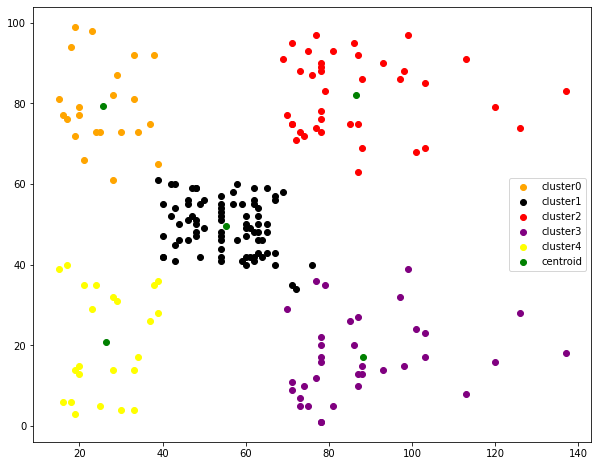

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(df0['income'],df0['score'] ,color = 'orange', label = 'cluster0')
plt.scatter(df1['income'],df1['score'] ,color = 'black', label = 'cluster1')
plt.scatter(df2['income'],df2['score'] ,color = 'red', label = 'cluster2')
plt.scatter(df3['income'],df3['score'] ,color = 'purple', label = 'cluster3')
plt.scatter(df4['income'],df4['score'] ,color = 'yellow', label = 'cluster4')
plt.scatter(centers[:,0], centers[:,1],color='green',label='centroid')
plt.legend()